In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt

In [2]:
## set working directory
os.chdir("/data1/niehu/ibd_public_data_20210821/analysis_20220111/02.integrate/Endothelial/")

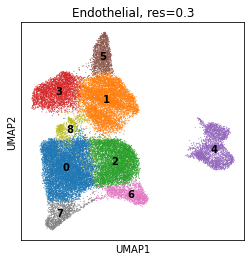

In [3]:
## read data
adata = sc.read_h5ad("Endothelial.bySample.n10.bbknn_umap_leiden_marker.res0.6.h5ad")
adata = sc.pp.subsample(adata, fraction=1., copy=True)
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', legend_loc='on data', title='Endothelial, res=0.3', frameon=True, legend_fontsize = 10)

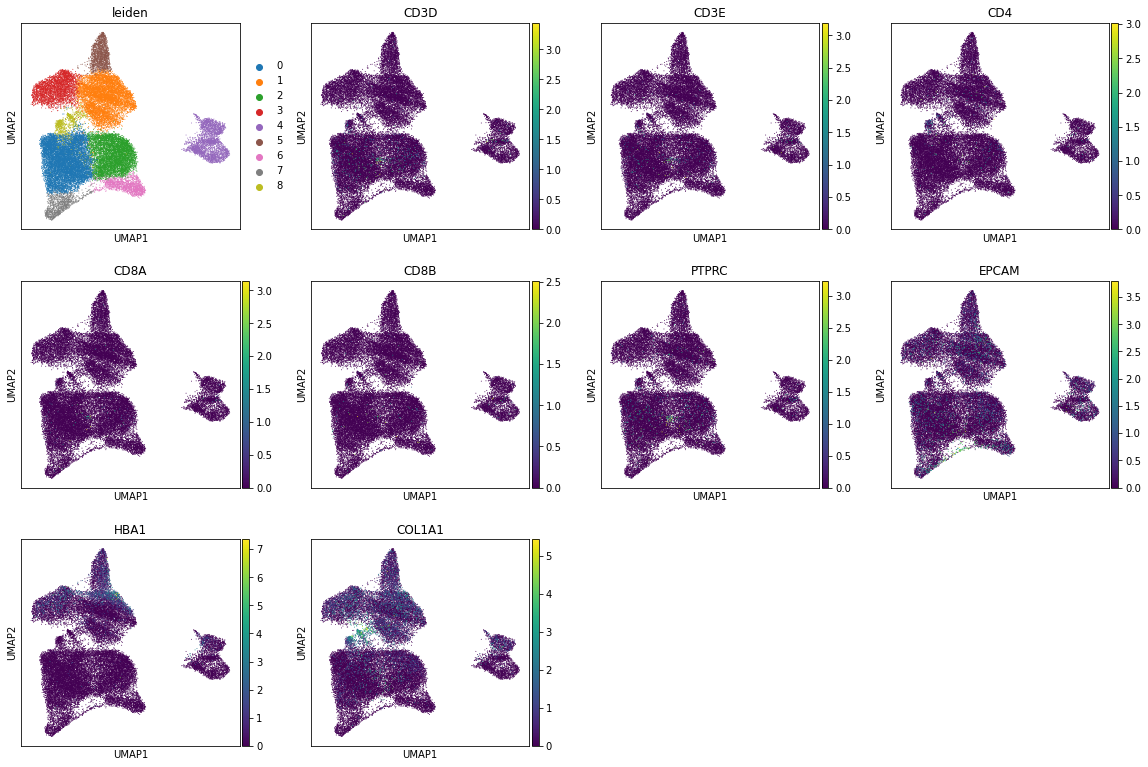

In [4]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color=['leiden',"CD3D","CD3E","CD4","CD8A","CD8B","PTPRC", "EPCAM","HBA1","COL1A1"])

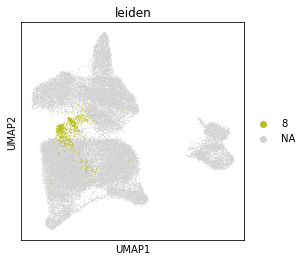

In [5]:
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata, color='leiden', groups=['8'])

In [6]:
cells = adata.obs[adata.obs.leiden != '8'].index.to_list()

In [7]:
tmp = sc.read_h5ad("../ibd_20220111.raw.h5ad")
adata = tmp[tmp.obs.index.isin(cells)]

In [8]:
PTPRC = adata[:,"PTPRC"].X.toarray()
EPCAM = adata[:,"EPCAM"].X.toarray()
HBA1 = adata[:,"HBA1"].X.toarray()
HBA2 = adata[:,"HBA2"].X.toarray()
HBB = adata[:,"HBB"].X.toarray()

In [9]:
total = np.array(adata.X.sum(axis=1))
PTPRC_exp = np.log2( PTPRC*10000/total + 1)
EPCAM_exp = np.log2( EPCAM*10000/total + 1)
HBA1_exp = np.log2( HBA1*10000/total + 1)
HBA2_exp = np.log2( HBA2*10000/total + 1)
HBB_exp = np.log2( HBB*10000/total + 1)
HB_exp = (HBA1_exp + HBA2_exp  + HBB_exp)/3

Text(0.5, 1.0, 'PTPRC_exp')

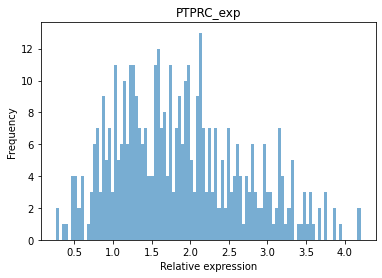

In [10]:
fig,ax=plt.subplots()
data = PTPRC_exp[PTPRC_exp > 0 ]
ax.hist(data,bins=100,histtype="stepfilled",alpha=0.6,label="PTPRC_exp")
plt.xlabel("Relative expression")
plt.ylabel("Frequency")
plt.title("PTPRC_exp")

Text(0.5, 1.0, 'EPCAM_exp')

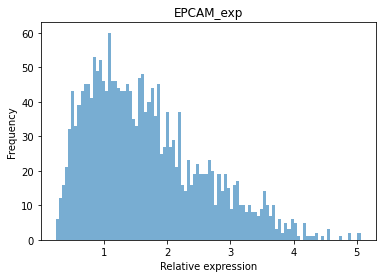

In [11]:
fig,ax=plt.subplots()
data = EPCAM_exp[EPCAM_exp > 0 ]
ax.hist(data,bins=100,histtype="stepfilled",alpha=0.6,label="EPCAM_exp")
plt.xlabel("Relative expression")
plt.ylabel("Frequency")
plt.title("EPCAM_exp")

Text(0.5, 1.0, 'HB_exp')

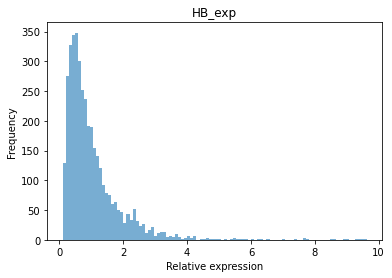

In [12]:
fig,ax=plt.subplots()
data = HB_exp[HB_exp > 0 ]
ax.hist(data,bins=100,histtype="stepfilled",alpha=0.6,label="HB_exp")
plt.xlabel("Relative expression")
plt.ylabel("Frequency")
plt.title("HB_exp")

In [13]:
select =  np.logical_or(PTPRC_exp > 0.1, HB_exp > 0.1)
select =  np.logical_or(select, EPCAM_exp > 0.1)
select =  np.logical_not(select)
print(np.sum(select)/len(select))

0.8205305790598934


In [14]:
adata = adata[select]

In [15]:
adata.write_h5ad("Endothelial.bySample.n10.filtered.h5ad")

In [16]:
## done